In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from alg_functions import *

In [2]:
%pip install astroML


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Obtain the Data

In [3]:
from astroML.datasets import fetch_rrlyrae_combined

X, y = fetch_rrlyrae_combined()

X = X[-5000:]
y = y[-5000:]

stars = (y == 0)
rrlyrae = (y == 1)

# Create a DataFrame from the array X
df = pd.DataFrame(X[:,0:2], columns=['u-g', 'g-r'])

# Add the array y as a new column to the DataFrame
df['type'] = np.where(y==0, 'stars', 'RR-Lyrae')

pred_columns_lyrae = ['u-g', 'g-r']

display(df.head())

,u-g,g-r,type
0,1.028999,0.379000,stars
1,0.945000,0.305000,stars
2,1.118000,0.396000,stars
3,0.962000,0.375000,stars
4,1.052000,0.335001,stars


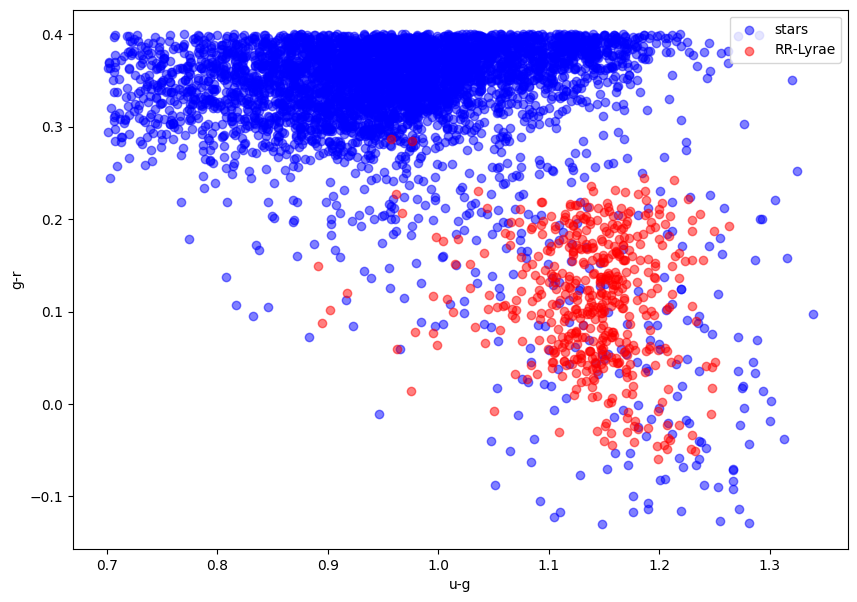

In [4]:
stars_df = df[df['type'] == 'stars']
rrlyrae_df = df[df['type'] == 'RR-Lyrae']

pred_columns_lyrae = ['u-g', 'g-r']

plt.figure(figsize=(10, 7))

plt.scatter(stars_df['u-g'], stars_df['g-r'], c='b', label='stars', alpha=0.5)
plt.scatter(rrlyrae_df['u-g'], rrlyrae_df['g-r'], c='r', label='RR-Lyrae', alpha=0.5)

plt.legend(loc='upper right')

plt.xlabel('u-g')
plt.ylabel('g-r')

plt.show()

# Algorithm 1

In [5]:
A = df[df['type'] == 'RR-Lyrae'][['u-g', 'g-r']].values
for epsilon in [0.01, 0.001, 0.0001]:
    print('epsilon: ', epsilon)
    c, r, k, chi, timer = frank_wolfe_alg_MEB(epsilon, A)
    print('---------------')


epsilon:  0.01
Center: [1.09525934 0.11722551]
Radius: 0.2189510675900554
Iterations: 95
CPU time: 0.19756293296813965
Core Set Size: 4
---------------
epsilon:  0.001
Center: [1.09443828 0.11809094]
Radius: 0.21797937143902912
Iterations: 996
CPU time: 1.4490759372711182
Core Set Size: 4
---------------
epsilon:  0.0001
Center: [1.09443863 0.11809045]
Radius: 0.21797877329853305
Iterations: 1000
CPU time: 1.4371750354766846
Core Set Size: 4
---------------


In [6]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(df[pred_columns_lyrae] - c, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < r

measure_accuracy('stars', 'RR-Lyrae', df)

,Metric,Count
0,True Positive (TP),482.000000
1,False Negative (FN),1.000000
2,True Negative (TN),4055.000000
3,False Positive (FP),462.000000
4,Precision,0.510593
5,Recall,0.997930
6,F1 Score,0.675543


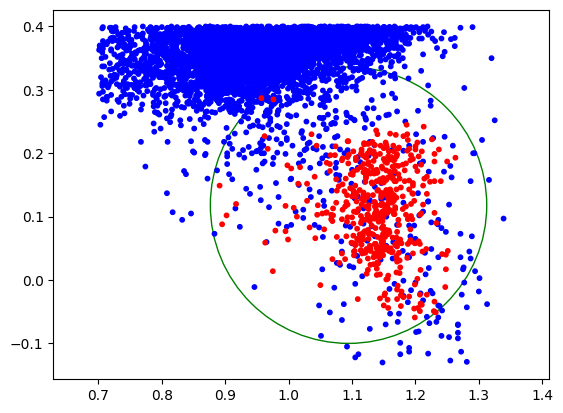

In [7]:
circle = plt.Circle(tuple(c), r, color='g', fill=False)

ax = plt.gca()
ax.cla()
ax.add_patch(circle)
plt.axis('equal')
plt.scatter(df['u-g'], df['g-r'], c=np.where(df['type'] == 'RR-Lyrae', 'r', 'b'), s=10)

# Algorithm 2

In [8]:
for epsilon in [0.01, 0.001, 0.0001]:
    A = df[df['type'] == 'RR-Lyrae'][['u-g', 'g-r']].values
    print('epsilon: ', epsilon)
    center_as, radius_as, count_iterations_as, CPU_time_as, dual_val_list_as, dual_gap_list_as = frankWolfe_AwayStep(A, epsilon)
    print('---------------')

epsilon:  0.01
Center: [1.06442206 0.10379833]
Radius: 0.2123746080725192
Iterations: 6
CPU time: 0.033869028091430664
Set Size: 3
---------------
epsilon:  0.001
Center: [1.09449911 0.11800003]
Radius: 0.21787044263440536
Iterations: 8
CPU time: 0.042308807373046875
Set Size: 2
---------------
epsilon:  0.0001
Center: [1.09449911 0.11800003]
Radius: 0.21787044263440536
Iterations: 8
CPU time: 0.03456306457519531
Set Size: 2
---------------


In [9]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(df[pred_columns_lyrae] - center_as, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_as

measure_accuracy('stars', 'RR-Lyrae', df)

,Metric,Count
0,True Positive (TP),481.000000
1,False Negative (FN),2.000000
2,True Negative (TN),4059.000000
3,False Positive (FP),458.000000
4,Precision,0.512247
5,Recall,0.995859
6,F1 Score,0.676512


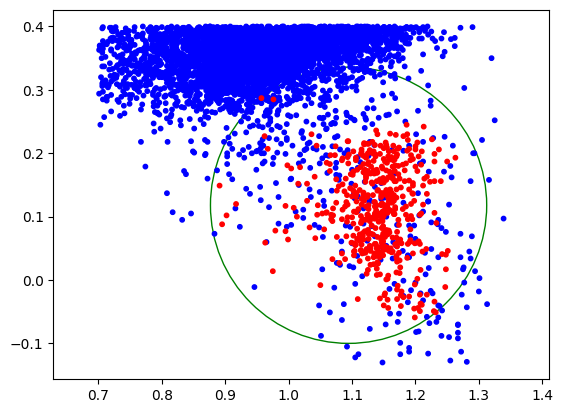

In [10]:
circle = plt.Circle(tuple(center_as), radius_as, color='g', fill=False)

ax = plt.gca()
ax.cla()
ax.add_patch(circle)
plt.axis('equal')
plt.scatter(df['u-g'], df['g-r'], c=np.where(df['type'] == 'RR-Lyrae', 'r', 'b'), s=10)

# Algorithm 3

In [11]:
for epsilon in [0.01, 0.001, 0.0001]:
    A = df[df['type'] == 'RR-Lyrae'][['u-g', 'g-r']].values
    print('epsilon: ', epsilon)
    center_pw, radius_pw, count_iterations_pw, CPU_time_pw, dual_val_list_pw, dual_gap_list_pw = frankWolfe_Pairwise(A, epsilon)
    print('---------------')

epsilon:  0.01
Center: [1.09449911 0.11800003]
Radius: 0.21787044263440639
Iterations: 4
CPU time: 0.03141188621520996
Set Size: 2
---------------
epsilon:  0.001
Center: [1.09449911 0.11800003]
Radius: 0.21787044263440639
Iterations: 4
CPU time: 0.010942935943603516
Set Size: 2
---------------
epsilon:  0.0001
Center: [1.09449911 0.11800003]
Radius: 0.21787044263440639
Iterations: 4
CPU time: 0.018848896026611328
Set Size: 2
---------------


In [12]:
# Calculate the Euclidean distance from each point to the center
distances = np.linalg.norm(df[pred_columns_lyrae] - center_pw, axis=1)

# Add a new boolean column indicating whether the point is inside the ball
df['InsideBall'] = distances < radius_pw

measure_accuracy('stars', 'RR-Lyrae', df)

,Metric,Count
0,True Positive (TP),481.000000
1,False Negative (FN),2.000000
2,True Negative (TN),4059.000000
3,False Positive (FP),458.000000
4,Precision,0.512247
5,Recall,0.995859
6,F1 Score,0.676512


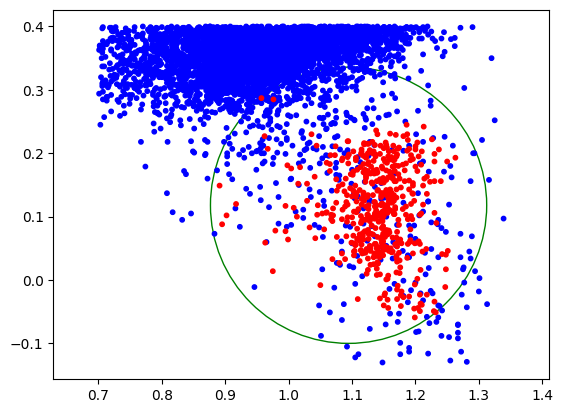

In [13]:
circle = plt.Circle(tuple(center_pw), radius_pw, color='g', fill=False)

ax = plt.gca()
ax.cla()
ax.add_patch(circle)
plt.axis('equal')
plt.scatter(df['u-g'], df['g-r'], c=np.where(df['type'] == 'RR-Lyrae', 'r', 'b'), s=10)